In [1]:
# import libs

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
Customer Data

It has details of customer with their annual income and Spending Score

'''
customer_info = pd.read_csv("customers_data.csv")

customer_info.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


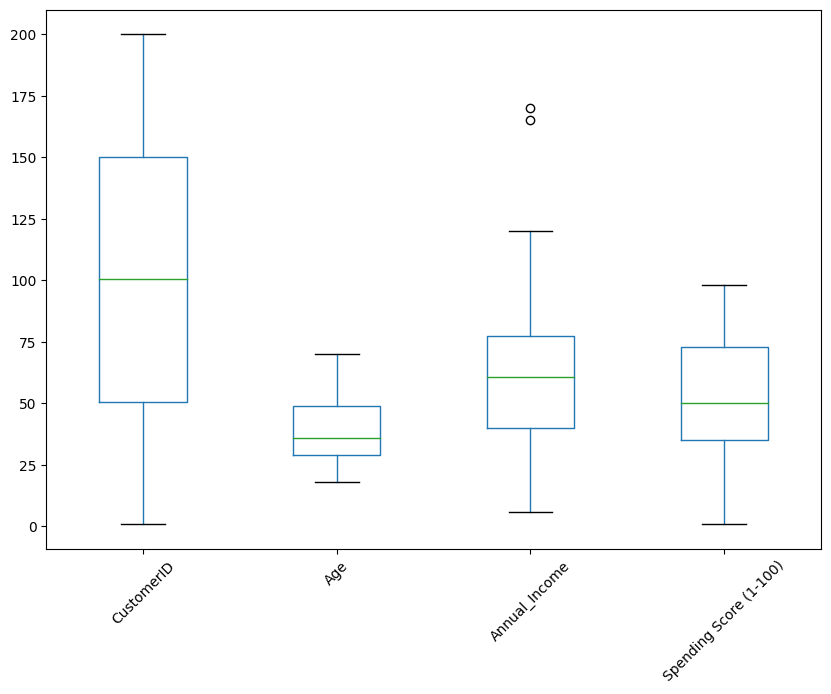

In [3]:
boxplot = customer_info.boxplot(grid=False, rot=45, figsize=(10,7))

In [5]:
# Boxplot result shows that Annual income has outliers.
# Each of the column is represnted by a box and whiskers.
# Points that are outside whiskers in Annual_income are outliers.
# Box represent inter-quartile range i.e., data point lies between 25th and 75th percentile

# As show above annual_income beyond 125 is considered an outlier

In [4]:
customer_info.loc[customer_info['Annual_Income'] > 125]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [5]:
# Above shows, at indices 198 and 199 Annual Income has outliers.

# Lets Caluclate 25th and 75th Percentiles of annual income

Q1 = customer_info['Annual_Income'].quantile(0.25)
Q3 = customer_info['Annual_Income'].quantile(0.75)

print(Q1, Q3)

40.0 77.25


In [6]:
#Interquartile Range (IQR)

IQR = Q3 - Q1

In [7]:
# Add new column Annual_Income_Outlier and mark it False for all values

customer_info['Annual_Income_Outlier'] = False

In [8]:
# Annual Income that is greater than --> Q1 + 1.5 * IQR is Outlier

Q1 + 1.5 * IQR

95.875

In [9]:
# For Loop to mark Annual_Income_Outlier as True where income > 95.875

for index, row in customer_info.iterrows():
    if row['Annual_Income'] > (Q1 + 1.5 * IQR):
        customer_info.at[index, 'Annual_Income_Outlier'] = True

In [11]:
# Now find all data that are not outlier

non_outliers = customer_info.loc[customer_info['Annual_Income_Outlier'] == False]

non_outliers.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [15]:
# Now calculate mean of non-outlier values and, 
# fill mean values for all outlier Annual Income Values

mean_non_outlier = non_outliers['Annual_Income'].mean()
mean_non_outlier

54.05555555555556

In [16]:
# Update all outlier values with mean value

for index, row in customer_info.iterrows():
    if row['Annual_Income_Outlier'] == True:
        customer_info.at[index, 'Annual_Income'] = mean_non_outlier

In [17]:
box_plot = customer_info.boxplot(grid=False, fontsize=15, 
                                 column=['Annual_Income'], figsize=(10, 8));

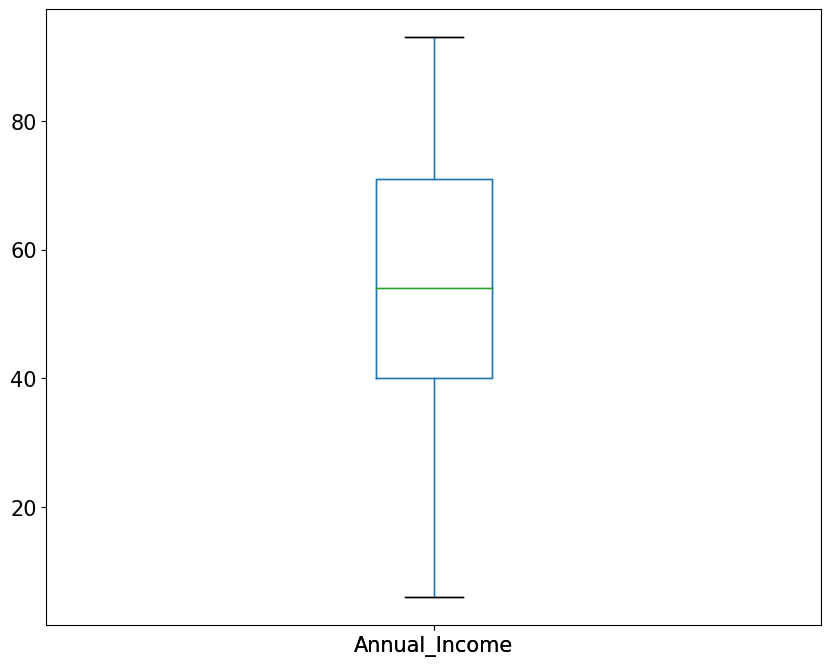

In [18]:
plt.show()